# Project 3: Poisonous mushrooms

# Author: Colby Carter

## Due: December 4, 2017

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 observations, where each mushroom is described by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. Since all the observations are categorical, I've binarized the feature space. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using KMeans and density estimation with Gaussian Mixture Models. Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
#from sklearn.mixture import GMM
from matplotlib.colors import LogNorm

Load feature names.

In [3]:
feature_names = []
with open('mushroom.map') as fmap:
    for line in fmap:
        [index, name, junk] = line.split()
        feature_names.append(name)

print('Loaded feature names:', len(feature_names))
print(type(fmap))

Loaded feature names: 126
<class '_io.TextIOWrapper'>


Load data. The data is sparse in the input file, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [4]:
X, Y = [], []

with open('mushroom.data') as fdata:
    for line in fdata:
        items = line.split()
        Y.append(int(items.pop(0)))
        x = np.zeros(len(feature_names))
        for item in items:
            feature = int(item.split(':')[0])
            x[feature] = 1
        X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


(1) Run Principal Components Analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 50].

In [8]:
def P1():
### STUDENT START ###
    pca_1 = PCA()
    pca_1.fit(train_data)
    for k in range(0,50):
        print("Feature",k+1,"=","{:.3f}".format(np.sum(pca_1.explained_variance_ratio_[0:k])))
    print("\nWith 98% of the training set's variance explained by the first 50 features, there is little need for the k>50 features.")
### STUDENT END ###

P1()

Feature 1 = 0.000
Feature 2 = 0.164
Feature 3 = 0.297
Feature 4 = 0.399
Feature 5 = 0.470
Feature 6 = 0.508
Feature 7 = 0.545
Feature 8 = 0.576
Feature 9 = 0.604
Feature 10 = 0.630
Feature 11 = 0.652
Feature 12 = 0.673
Feature 13 = 0.691
Feature 14 = 0.709
Feature 15 = 0.726
Feature 16 = 0.741
Feature 17 = 0.756
Feature 18 = 0.770
Feature 19 = 0.784
Feature 20 = 0.798
Feature 21 = 0.809
Feature 22 = 0.820
Feature 23 = 0.830
Feature 24 = 0.841
Feature 25 = 0.851
Feature 26 = 0.860
Feature 27 = 0.868
Feature 28 = 0.876
Feature 29 = 0.884
Feature 30 = 0.892
Feature 31 = 0.899
Feature 32 = 0.905
Feature 33 = 0.911
Feature 34 = 0.917
Feature 35 = 0.922
Feature 36 = 0.927
Feature 37 = 0.932
Feature 38 = 0.937
Feature 39 = 0.942
Feature 40 = 0.947
Feature 41 = 0.951
Feature 42 = 0.955
Feature 43 = 0.959
Feature 44 = 0.963
Feature 45 = 0.966
Feature 46 = 0.970
Feature 47 = 0.973
Feature 48 = 0.975
Feature 49 = 0.978
Feature 50 = 0.980

With 98% of the training set's variance explained by the f

(2) PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and plot it. Show the positive (poisonous) cases in blue and the negative (non-poisonous) in red. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

[ True False False  True False False False  True False False]
train pos= (3198, 2)
train neg= (3802, 2)
(3198,)


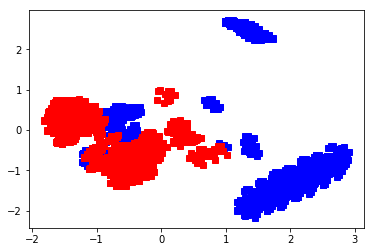

In [66]:
def P2():
### STUDENT START ###
    pca_2 = PCA(n_components=2)
    train_data2 = pca_2.fit_transform(train_data)
    
    label_pos, label_neg = (train_labels[:] == 1), (train_labels[:] == 0)
    print(label_pos[0:10])
    train_pos, train_neg = train_data2[label_pos], train_data2[label_neg]
    print("train pos=",train_pos.shape)
    print("train neg=",train_neg.shape)
    print(train_pos[:,1].shape)
    plt.plot(train_pos[:,0], train_pos[:,1], 'bs', train_neg[:,0], train_neg[:,1], 'rs',)
    
    #poison = train_data2[train_data[:]==1,:]
    
### STUDENT END ###

P2()

(3) Run KMeans with [1,16] clusters over the 2d projected data. Mark each centroid cluster and plot a circle that goes through the most distant point assigned to each cluster.

In [ ]:
#def P3():
### STUDENT START ###

### STUDENT END ###

#P3()

(4) Fit a Gaussian Mixture Model for the positive examples in your 2d projected data. Plot the estimated density contours as shown here: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py. Vary the number of mixture components from 1-4 and the covariance matrix type ('spherical', 'diag', 'tied', 'full').

In [ ]:
#def P4():
### STUDENT START ###

### STUDENT END ###

#P4()

(5) Fit two 4-component full covariance GMMs, one for the positive examples and one for the negative examples in your 2d projected data. Predict the test examples by choosing the label for which the model gives a larger probability (use GaussianMixture.score_samples). What is the accuracy?

In [ ]:
#def P5():
### STUDENT START ###

### STUDENT END ###

#P5()

(6) Ideally, we'd like a model that gives the best accuracy with the fewest parameters. Run a series of experiments to find the model that gives the best accuracy with no more than 50 parameters. For example, with 3 PCA components and 2-component diagonal covariance GMMs, you'd have:

( (3 mean vector + 3 covariance matrix) x 2 components ) x 2 classes = 24 parameters

You should vary the number of PCA components, the number of GMM components, and the covariance type.

In [ ]:
#def P6():
### STUDENT START ###

### STUDENT END ###

#P6()